# Analyis and imbalanced classification of Anti-CoV AMP prediction

Parts of the plots in the article can be shown here. For other plots, we also offer the function that let you implement, for which is located in the `visualize.py`.

In [1]:
from visualize import mean_aac_plot, features
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

## Mean AAC observation of three kinds of peptides sets
Bar plot of the mean Amino Acid Composition in Three different Peptides: 
* Anti-CoV \[137\]
* Anti-Virus (Anti-CoV excluded) \[2125\]
* non-AVP (AVP excluded AMP dataset) \[5217\]
* non-AMP \[4979\]

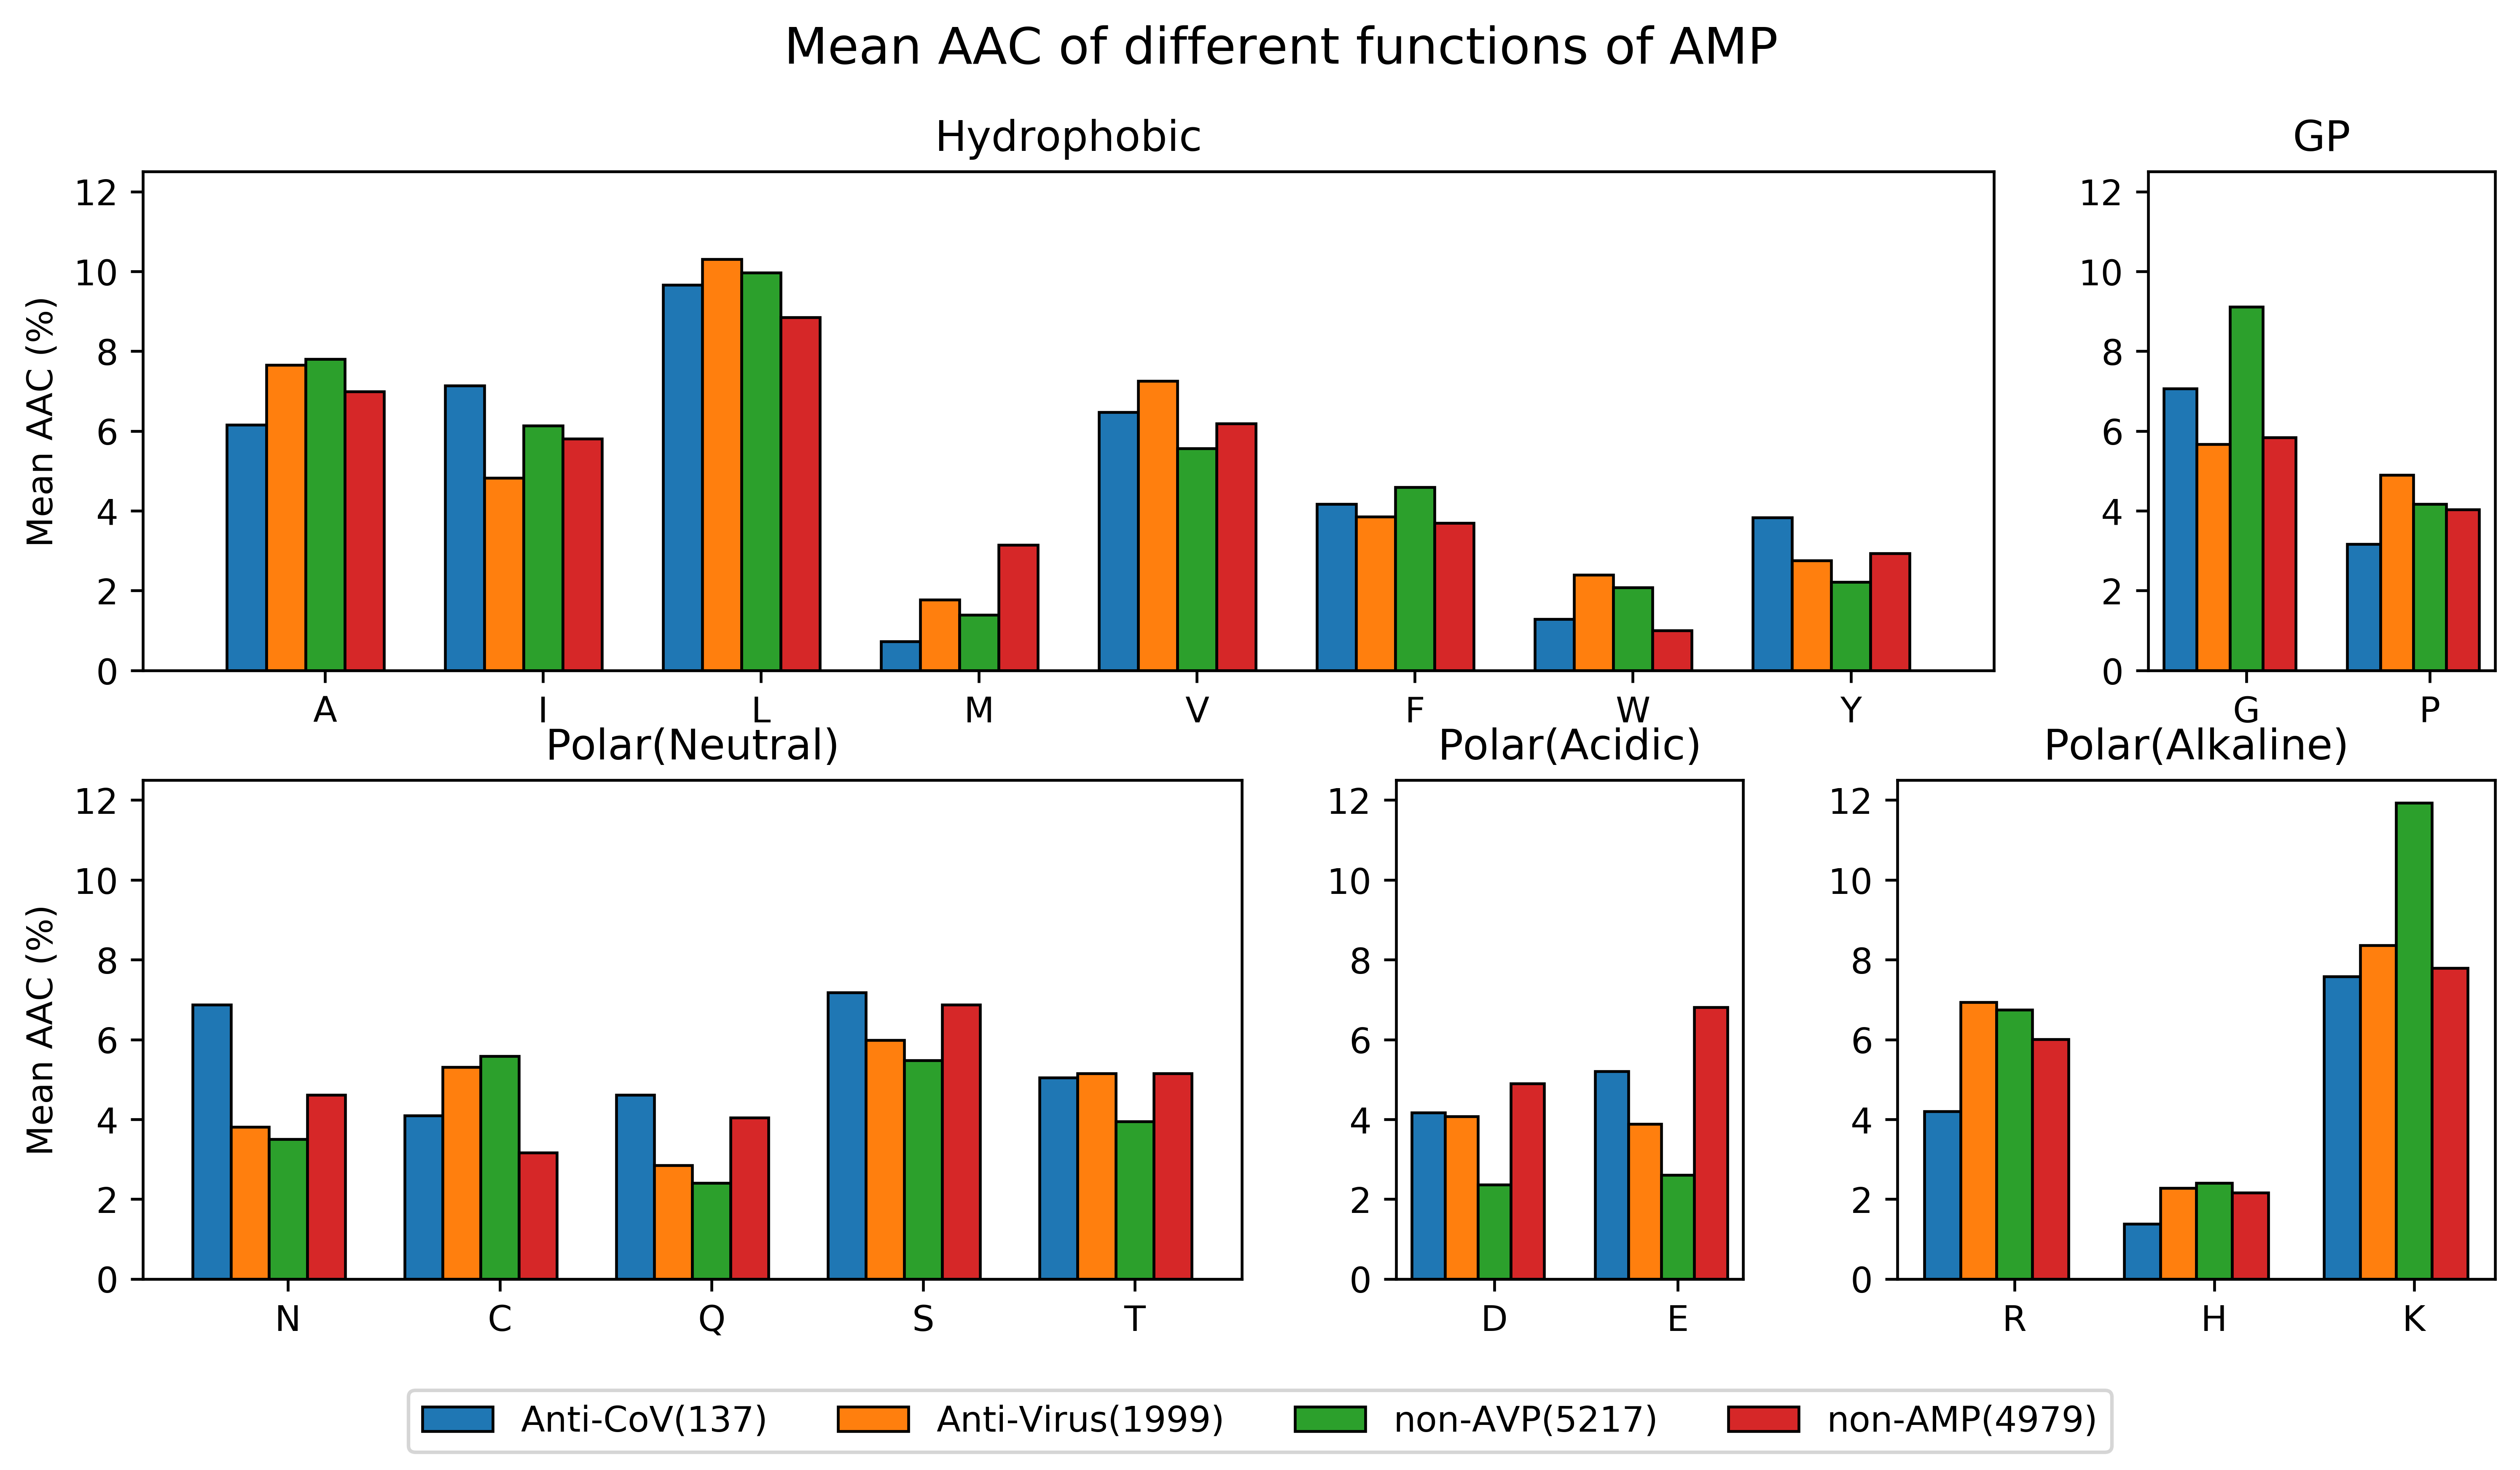

In [2]:
amp_sets = {
    "Anti-CoV": pd.read_csv("data/Anti-CoV.csv"),
    "Anti-Virus": pd.read_csv("data/Anti-Virus.csv"),
    "non-AVP": pd.read_csv("data/non-AVP.csv"),
    "non-AMP": pd.read_csv("data/non-AMP.csv")
}
aac_plot, mean_aac = mean_aac_plot(amp_sets)

We cannot say there is significant difference between Three sets of peptides, but there is still considerable comparisons between some A.A like Asn (N) and Cys (C).

## Length Distribution of the discovered Anti-CoV functional Peptide

Histogram of length distribution comparison between Anti-CoV and entire Anti-Virus set.

/home/poncey/miniconda3/envs/AMPrediction/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/poncey/miniconda3/envs/AMPrediction/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/poncey/miniconda3/envs/AMPrediction/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displ

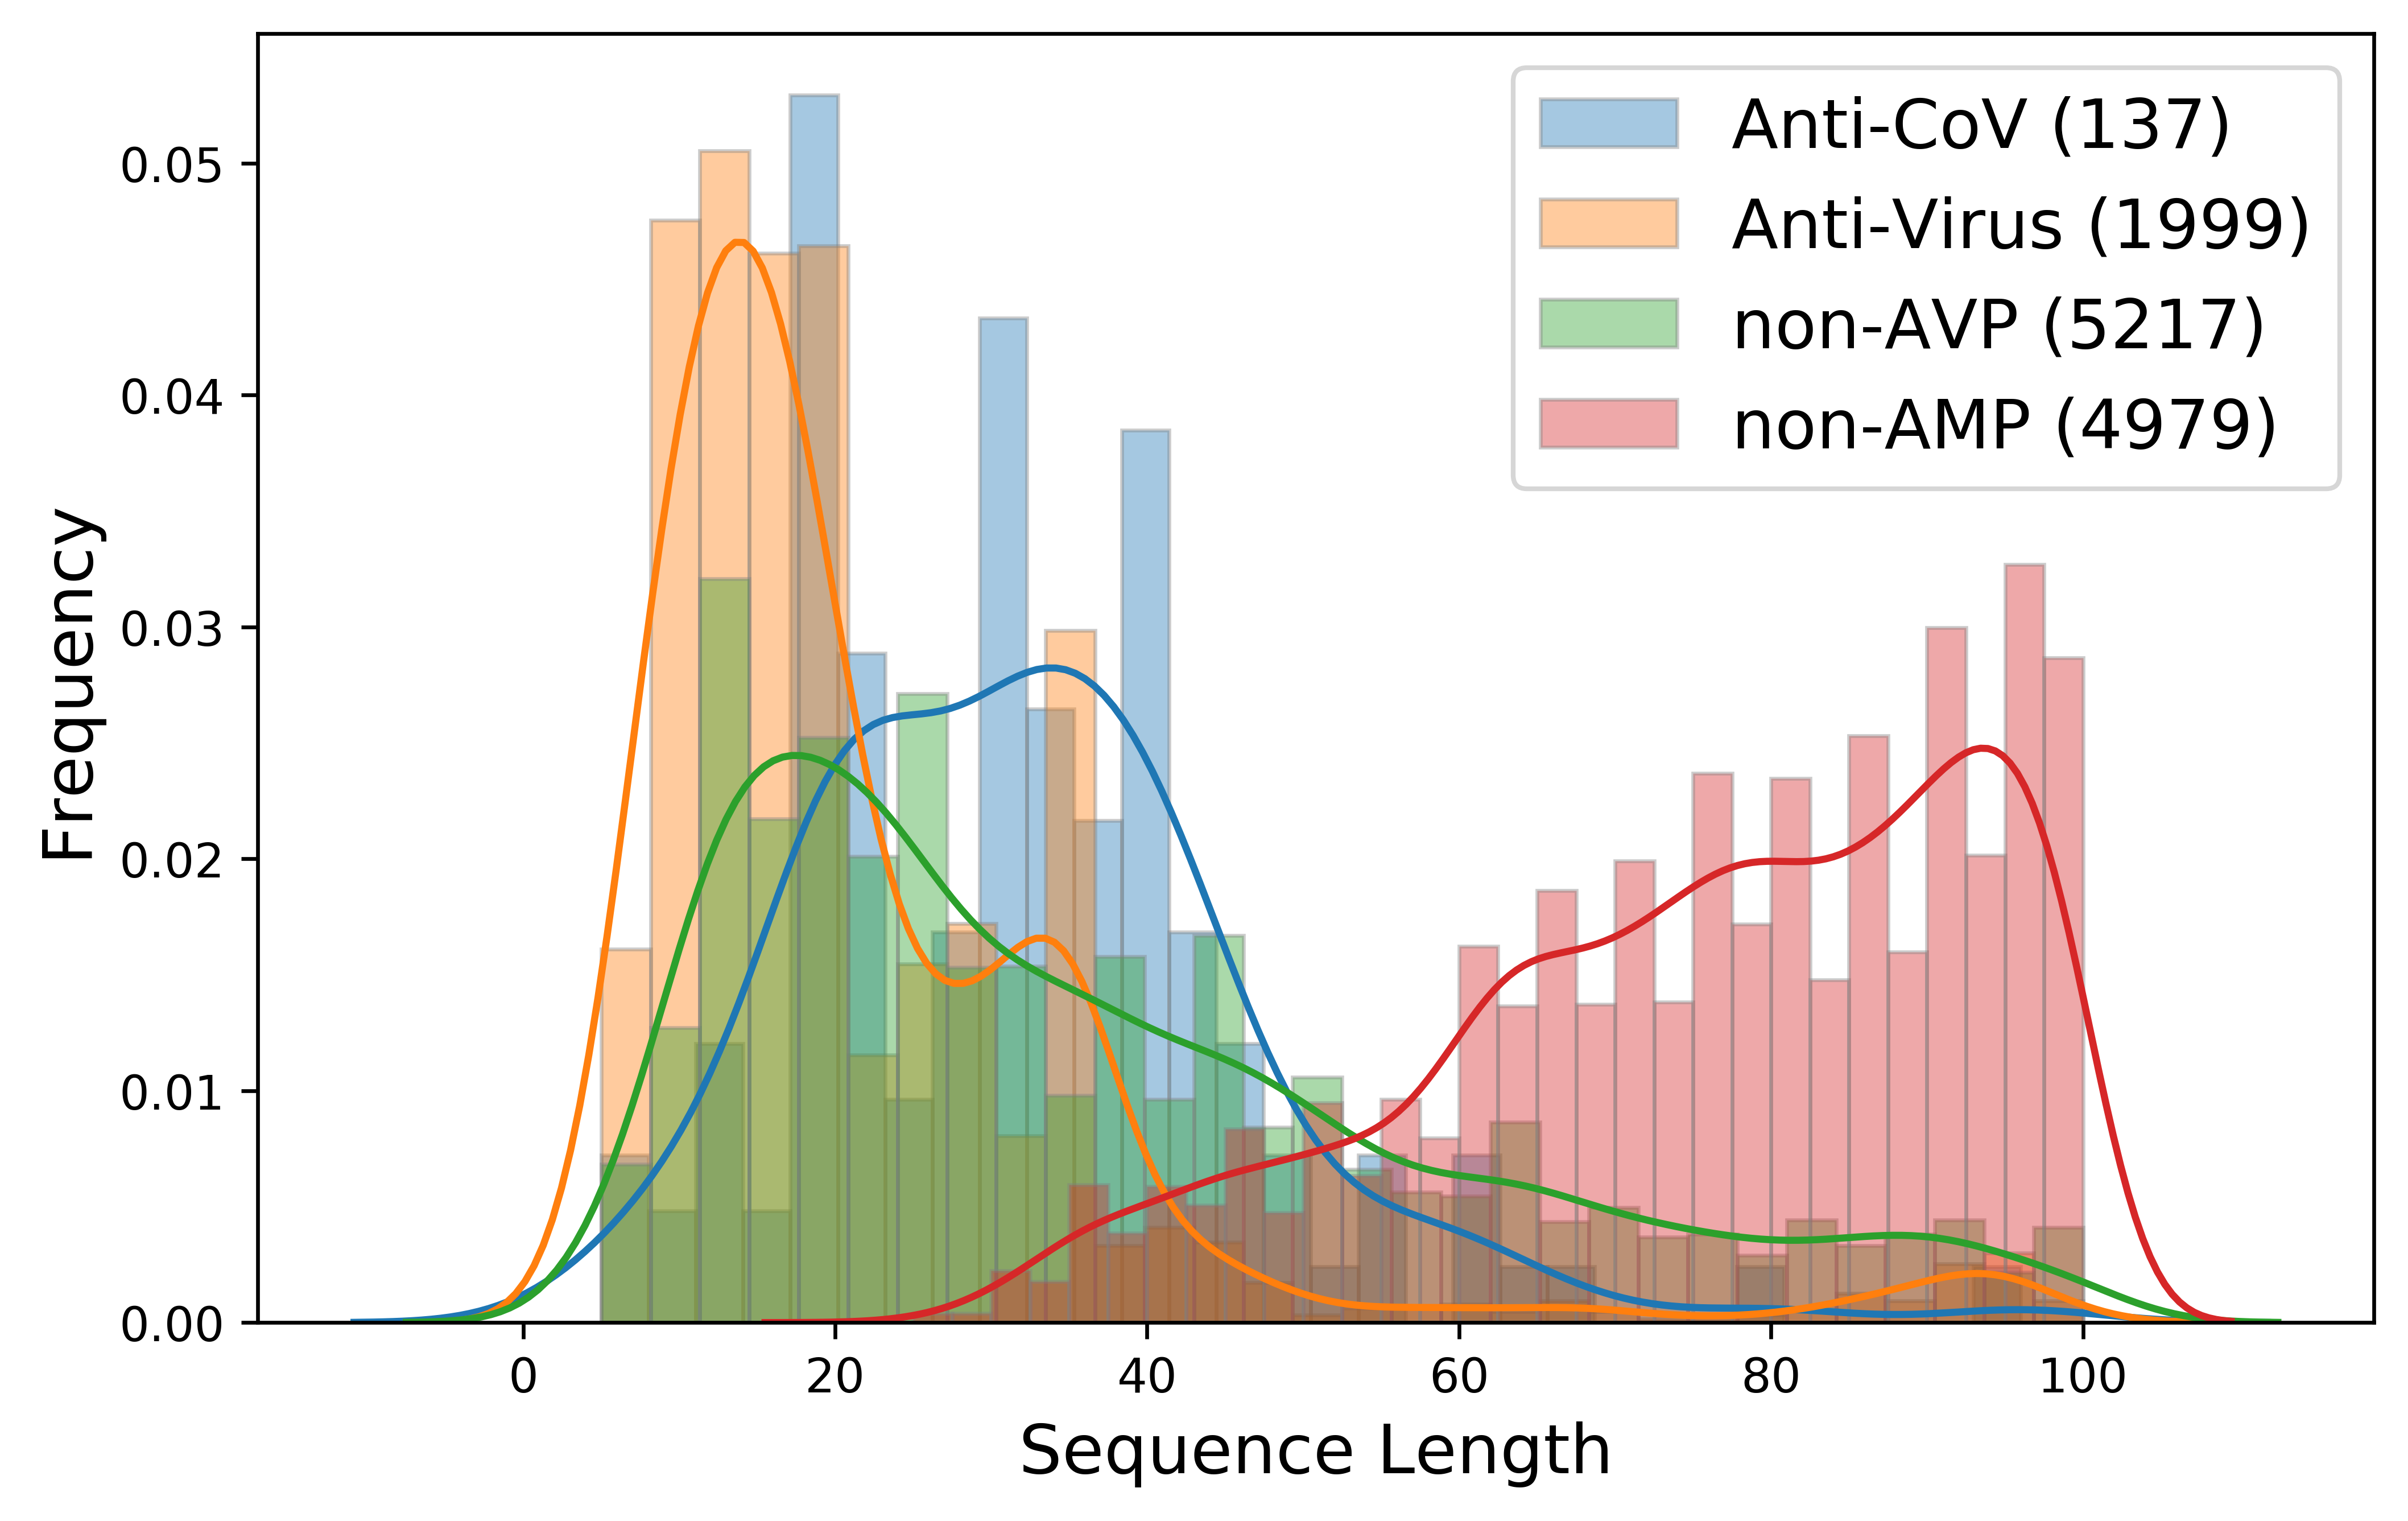

In [3]:
lengthfig = plt.figure(figsize=(8, 5), dpi=600)
for set_name, df in amp_sets.items():
    seqs_length = df['Sequence'].str.len()
    sns.distplot(seqs_length, bins=30, label="{:s} ({:d})".format(set_name, len(df)), rug=False, kde=True,
                hist_kws=dict(edgecolor="#808080", linewidth=.8))
plt.xlabel("Sequence Length", fontsize='x-large')
plt.ylabel("Frequency", fontsize='x-large')
lgd = plt.legend(fontsize='x-large')

## Scatter plot of 8-PHYC features comparison

We create the sctter plot to see if there is a significant differences in feature scatter plot between **stage1-AMP** and **non-AMP** on the training set.

In [4]:
training_sets = {
    "Anti-CoV": pd.read_csv("data/train_data/Anti-CoV_train.csv"),
    "Anti-Virus": pd.read_csv("data/train_data/Anti-Virus_train.csv"),
    "non-AVP": pd.read_csv("data/train_data/non-AVP_train.csv"),
    "non-AMP": pd.read_csv("data/train_data/non-AMP_train.csv")
}
training_sets['stage1-AMP'] = pd.concat([training_sets[lab] for lab in ["Anti-CoV","Anti-Virus", "non-AVP"]])
training_sets['stage1-AMP'].loc[:, 'Label'] = 'Stage1-AMP ({:d})'.format(len(training_sets['stage1-AMP']))
training_sets['non-AMP'].loc[:, 'Label'] = 'non-AMP ({:d})'.format(len(training_sets['non-AMP']))
pairsets = pd.concat([training_sets['stage1-AMP'], training_sets['non-AMP']], axis=0)[['Id', 'Sequence', *features, 'Label']]

In [5]:
pairsets.columns = ['Id', 'Sequence', 'IEP', 'Net Charge', 'Hydrophobicity',
       'Hydrophobic\nMoment', 'Transmembrane\nPropensity', 'Boman\nIndex',
       'Aliphatic\nIndex', 'Alpha Helical\nPropensity', 'Label']

<Figure size 8000x8000 with 0 Axes>

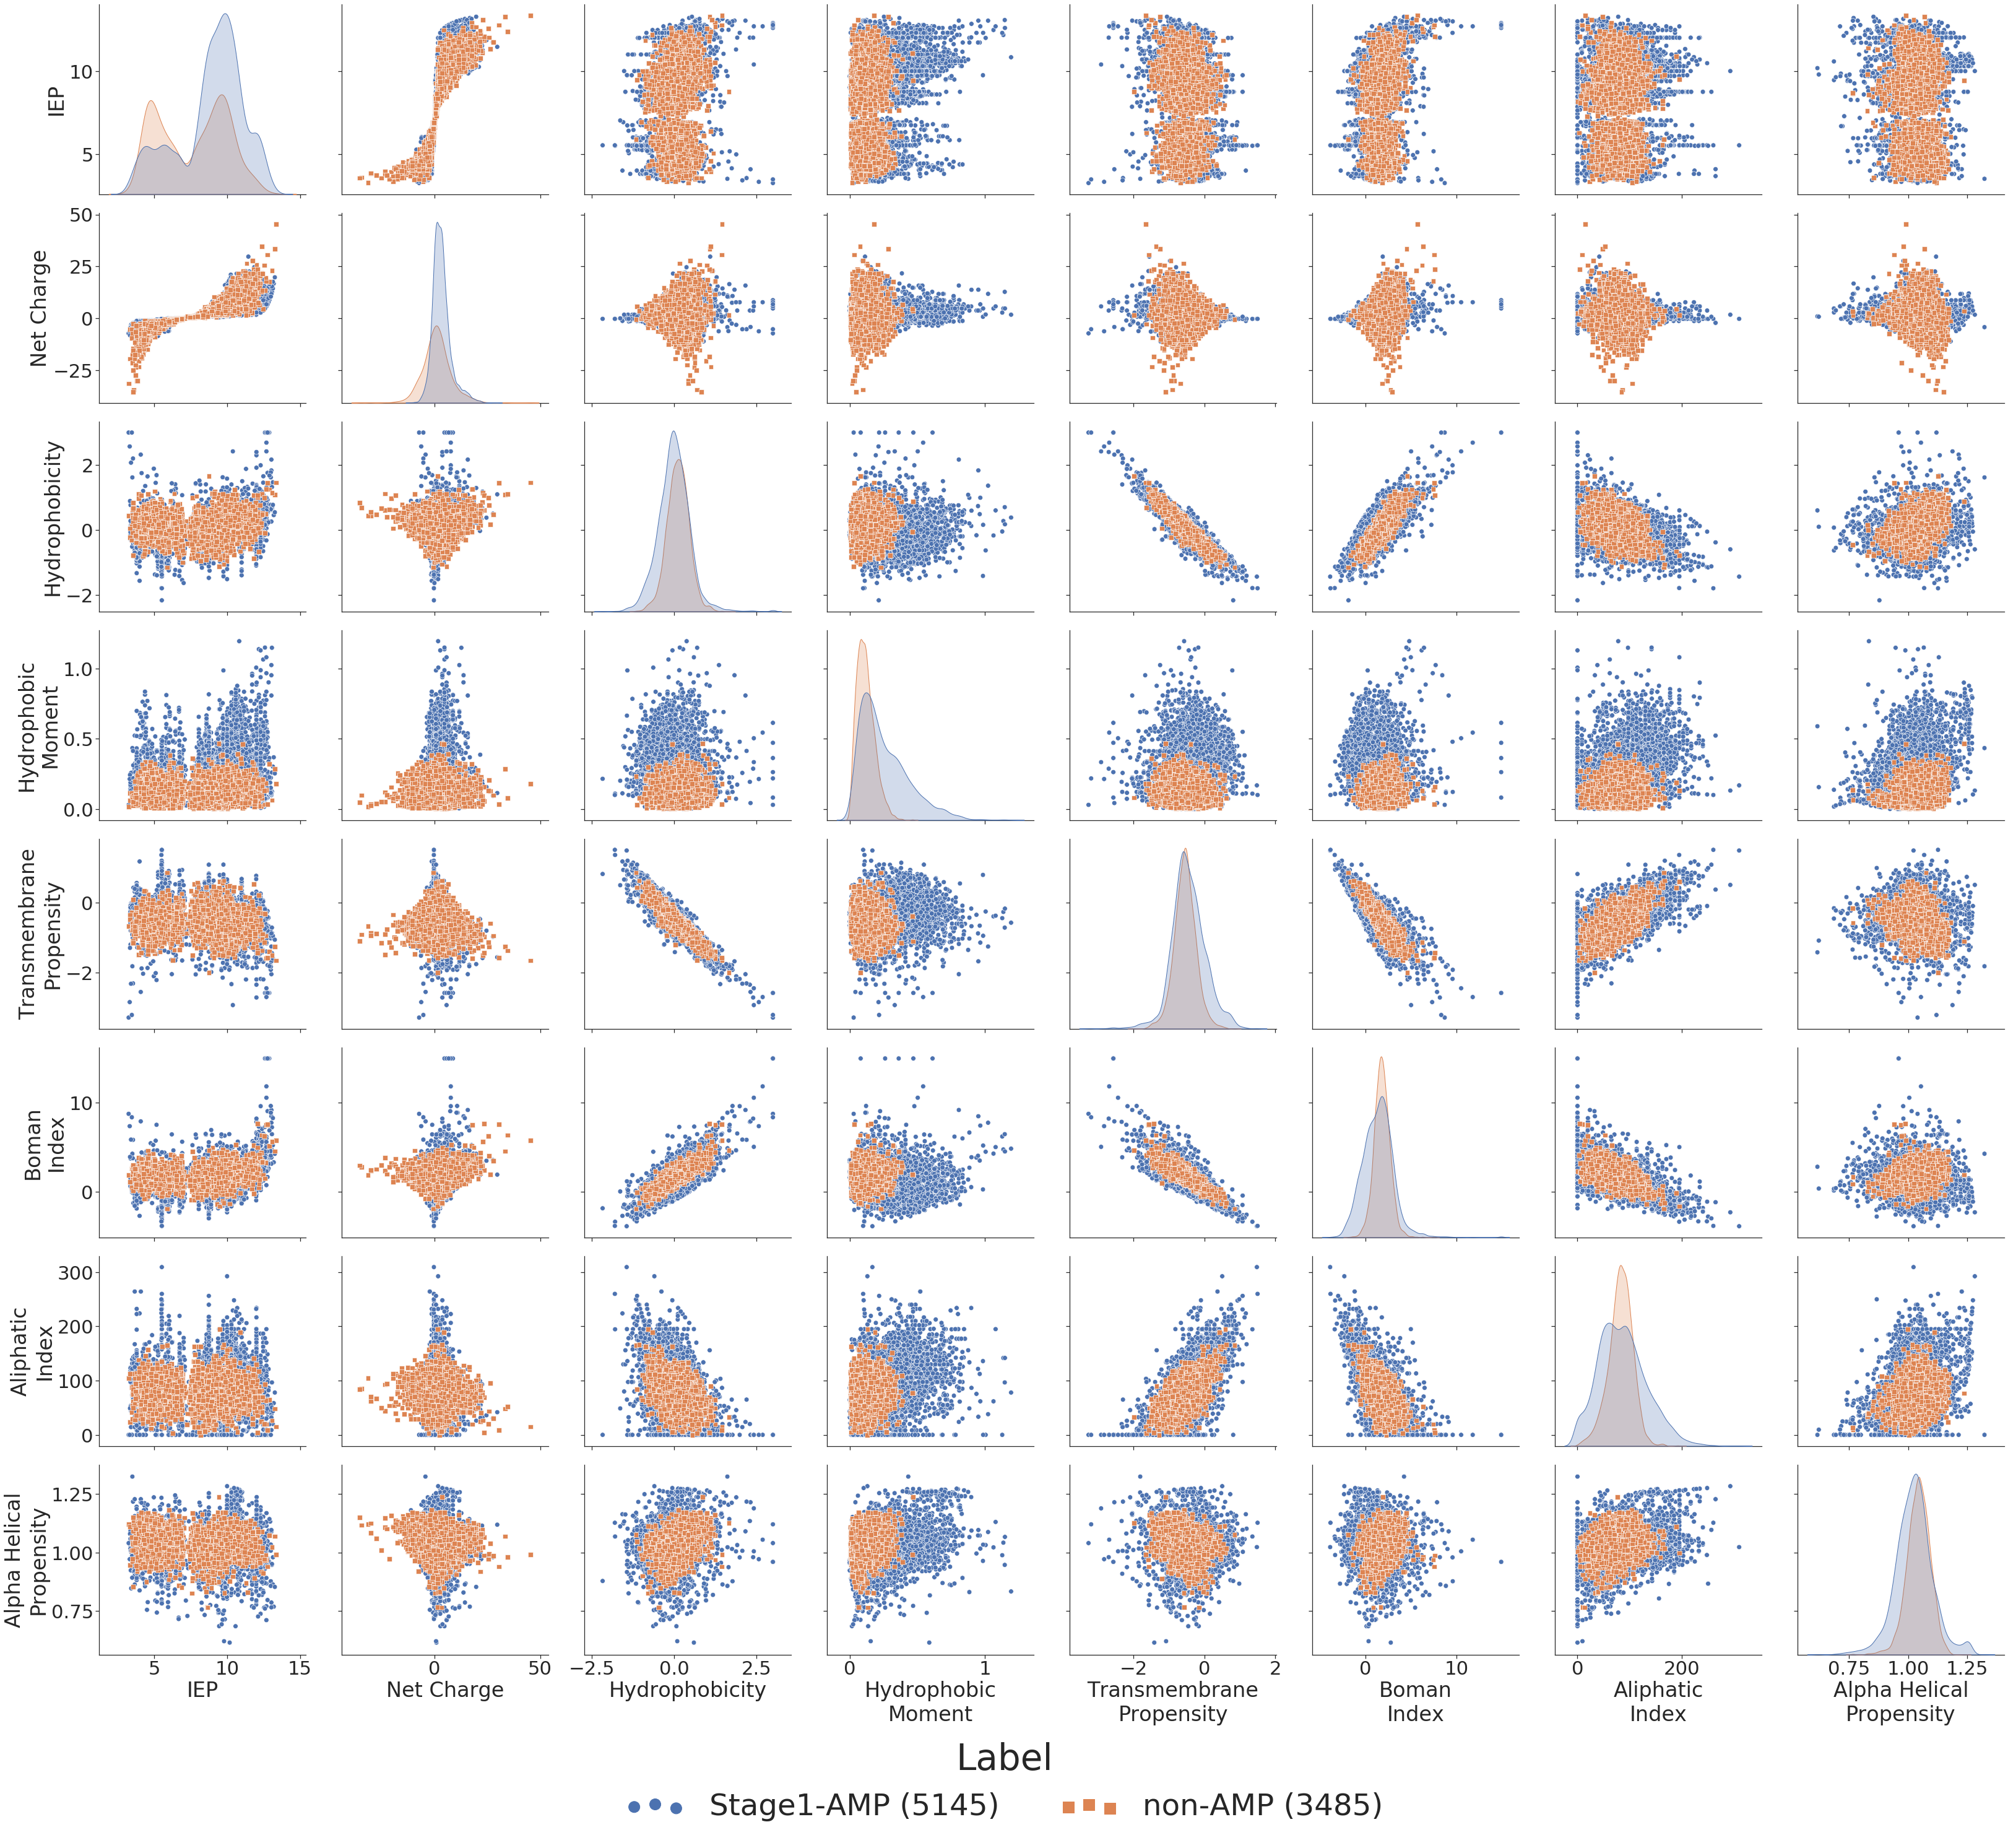

In [6]:
sns.set(font_scale=2.8, style="ticks")
fig = plt.figure(figsize=(20, 20), dpi=400)
g = sns.pairplot(pairsets, hue='Label', height=5.2, markers=["o", "s"], plot_kws={'s': 60})
g._legend.remove()
g.add_legend(loc="lower center", ncol=3, fontsize="x-large", scatterpoints=3, markerscale=3.)
g._legend.get_title().set_fontsize('xx-large')
g.fig.subplots_adjust(top=1., bottom=0.11)